![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

## Analisis de resultados

Temporada 1: promedio de 116.34 alquileres.


Temporada 2: promedio de 215.25 alquileres.


Temporada 3: promedio de 234.42 alquileres.


Temporada 4: promedio de 198.99 alquileres.


Con base a los resultados arrojados, se puede inferir lo siguiente:


La demanda de alquiler de bicicletas experimenta variaciones a lo largo del año. En la temporada 1, es más baja, seguida de un aumento significativo en la temporada 2 y su punto máximo en la temporada 3. Posteriormente, la demanda disminuye en la temporada 4, aunque se mantiene relativamente alta en comparación con la temporada 1. Estos cambios podrían atribuirse a las condiciones climáticas más favorables para el ciclismo durante la temporada 2 y en la temporada 3.

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

## Analisis de resultados
La demanda de alquileres de bicicletas muestra una clara tendencia diaria, con mínimos durante las horas nocturnas (2-4 AM) y picos durante las horas pico de desplazamientos (8 AM y 5-6 PM).


Con base a los resultados arrojados, se puede inferir lo siguiente:

    
- Los mínimos alrededor de las 3-4 AM sugieren que muy pocas personas alquilan bicicletas durante las horas más tempranas, probablemente debido a la menor actividad social y laboral.
- Los picos en las horas de la mañana (alrededor de las 8 AM) y la tarde (5-6 PM) indican un uso intenso de las bicicletas para desplazamientos al trabajo o la escuela.
- La demanda se mantiene razonablemente alta desde las 10 AM hasta las 8 PM, lo que sugiere que además de los desplazamientos, las bicicletas también se utilizan para actividades de ocio y otras necesidades de transporte durante el día.


In [6]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


## Analisis complementario

#### Season
Std: La desviación estándar es de aproximadamente 1.12, lo que sugiere una distribución bastante uniforme entre las 4 temporadas.
Min/Max: Los valores van de 1 a 4, que son los identificadores para las cuatro temporadas.
Percentiles: El 25% de los datos están en temporada 2 o menos, el 50% están en temporada 3 o menos, y el 75% están en temporada 4 o menos, lo que confirma la distribución de los datos a lo largo de las cuatro temporadas.

Al analizar la demanda de alquiler de bicicletas, notamos una variabilidad significativa. En mi observación, se encontró que la temporada 3 tiene el mayor promedio de alquileres, mientras que la temporada 1 registra el más bajo, utilizando la numeración de temporadas comúnmente aceptada.

Además, al considerar la desviación estándar en cada temporada, podemos entender mejor la dispersión de los datos alrededor de la media. Esto nos indica la variabilidad en la demanda dentro de cada temporada.

#### hour
Std: La desviación estándar es aproximadamente 6.92, indicando que las horas están distribuidas uniformemente a lo largo del día.
Min/Max: Las horas van de 0 a 23, lo cual es esperado ya que representa las 24 horas del día.
Percentiles: El 25% de los datos están en la hora 6 o antes, el 50% en la hora 12 o antes, y el 75% en la hora 18 o antes, mostrando una distribución uniforme a través del día.





### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

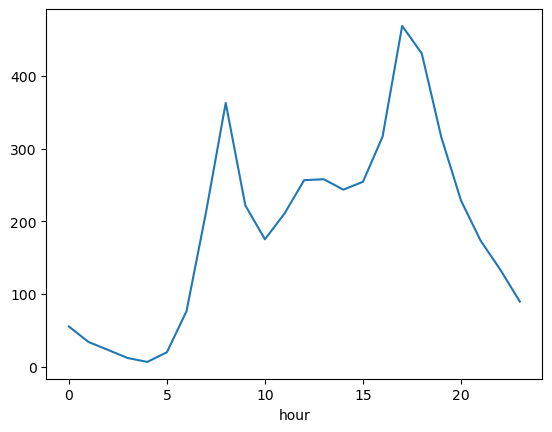

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

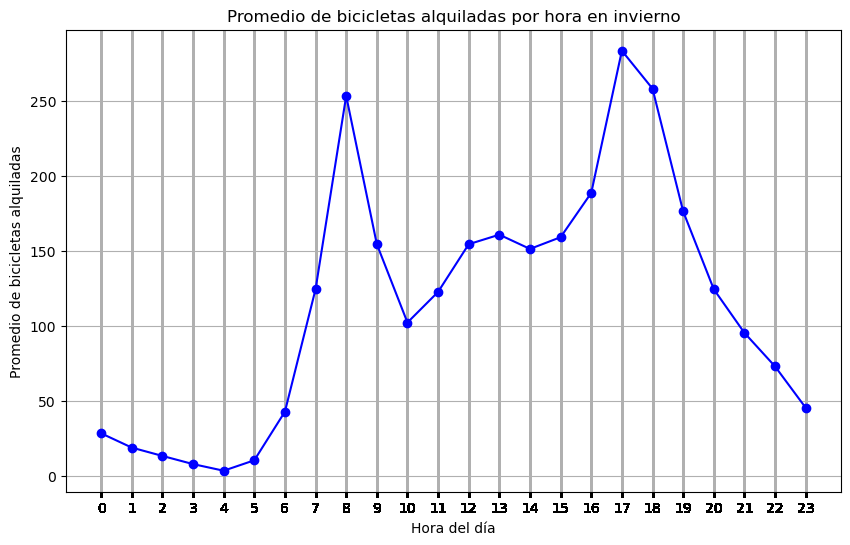

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt
# Filtrar datos para invierno
bikes_winter = bikes[bikes['season'] == 1]

# Calcular el promedio de bicicletas rentadas por hora
average_rentals_winter = bikes_winter.groupby('hour')['total'].mean()

# Generar gráfica para invierno
plt.figure(figsize=(10, 6))
plt.plot(average_rentals_winter, marker='o', linestyle='-', color='blue')
plt.title('Promedio de bicicletas alquiladas por hora en invierno')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de bicicletas alquiladas')
plt.grid(True)
hours= bikes['hour']
plt.xticks(hours)  # Asegurar que se muestren todas las horas
plt.show()




In [9]:
average_rentals_winter

hour
0      28.292035
1      18.761062
2      13.205607
3       7.760417
4       3.336634
5      10.300000
6      42.725664
7     124.433628
8     253.345133
9     154.442478
10    102.168142
11    122.601770
12    154.412281
13    160.771930
14    151.263158
15    159.087719
16    188.640351
17    283.456140
18    258.157895
19    176.315789
20    124.394737
21     95.298246
22     72.912281
23     45.333333
Name: total, dtype: float64

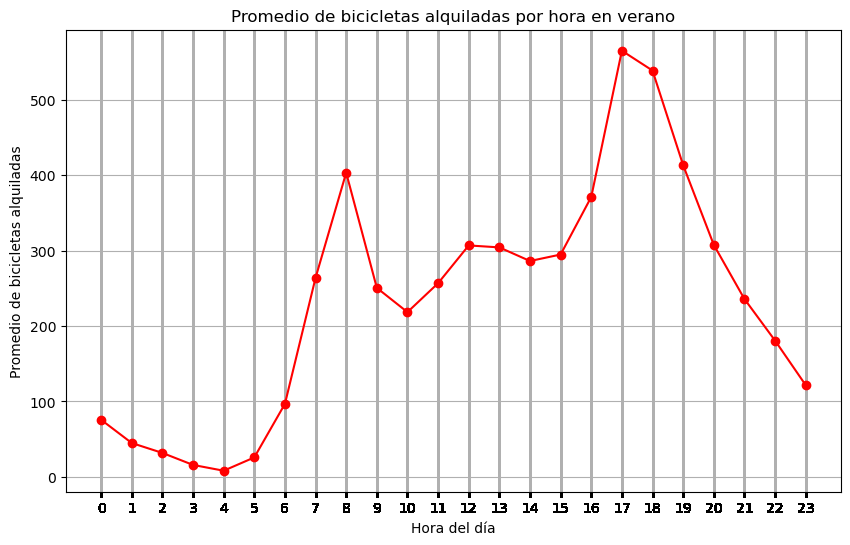

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtrar datos para verano
bikes_summer = bikes[bikes['season'] == 3]

# Calcular el promedio de bicicletas rentadas por hora
average_rentals_summer = bikes_summer.groupby('hour')['total'].mean()

# Generar gráfica para verano
plt.figure(figsize=(10, 6))
plt.plot(average_rentals_summer, marker='o', linestyle='-', color='red')
plt.title('Promedio de bicicletas alquiladas por hora en verano')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de bicicletas alquiladas')
plt.grid(True)
hours= bikes['hour']
plt.xticks(hours)  # Asegurar que se muestren todas las horas
plt.show()


In [11]:
average_rentals_summer

hour
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298
Name: total, dtype: float64

## Analisis de las graficas

#### Tendencias Generales:

Ambos gráficos muestran dos picos pronunciados, lo que sugiere que hay dos horas pico durante el día en las que las bicicletas se alquilan con más frecuencia. Es común que estos picos correspondan a las horas de inicio y fin de la jornada laboral.

#### Comparación de Volumen:

El gráfico con los puntos rojos en temporada de en verano muestra un volumen significativamente mayor de bicicletas alquiladas en comparación con el gráfico de puntos azules en temporada de invierno. Esto podría deberse a varias razones, como mejores condiciones climáticas, un día en particular con eventos especiales que requieran el uso de bicicletas, o simplemente una mayor cantidad de usuarios activos en el servicio de alquiler ese día.

#### Horas Pico:

En el gráfico azul, los picos ocurren alrededor de las 8 de la mañana y las 6 de la tarde.
En el gráfico rojo, los picos son más altos y también ocurren alrededor de las 8 de la mañana y las 6 de la tarde, pero hay un pico adicional alrededor de las 5 de la tarde que es más pronunciado que en el gráfico azul.


#### Horas de Menor Actividad:

En ambos gráficos, las horas de menor actividad parecen ser entre la medianoche y las 5 de la mañana, lo cual es esperable ya que es un horario común de descanso.

#### Variaciones y Anomalías:

Hay una caída notoria en el alquiler de bicicletas en el gráfico rojo alrededor de las 10 de la mañana, que no se observa en el gráfico azul. Además, el gráfico rojo muestra un aumento considerable después de esta caída, lo que podría sugerir que hubo un evento o una razón específica para este patrón anormal.



En resumen, ambos gráficos indican un patrón de dos picos durante las horas de inicio y fin de la jornada laboral. Sin embargo, la cantidad de bicicletas alquiladas y ciertos patrones varían entre los dos conjuntos de datos, lo que podría indicar diferentes días, condiciones climáticas o factores externos que afectan el comportamiento de alquiler.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21


In [13]:
bikes['sesonprueba'] = pd.factorize(bikes.season)[0]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y_reg = bikes['total']
X_reg = bikes[['season', 'hour']]


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_reg, y_train_reg)

y_pred = model.predict(X_test_reg)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_reg, y_pred)
print("Error cuadrático medio:", mse)

# Si lo deseas, puedes imprimir los coeficientes y el término de intercepción del modelo
print("Coeficientes:", model.coef_)
print("Intercepción:", model.intercept_)

Error cuadrático medio: 26898.274894466886
Coeficientes: [26.93974052 10.5544872 ]
Intercepción: 2.1473084972574554


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Asumiendo 'bikes' es tu DataFrame y ya contiene 'hour' correctamente
y_reg = bikes['total']
X_reg = bikes[['season', 'hour']]

# Convertir 'season' a variables dummy
X_reg = pd.get_dummies(X_reg, columns=['season'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train_reg, y_train_reg)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_reg)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_reg, y_pred)
print("Error cuadrático medio:", mse)

# Imprimir los coeficientes y el término de intercepción del modelo
print("Coeficientes:", model.coef_)
print("Intercepción:", model.intercept_)


Error cuadrático medio: 25409.920498970598
Coeficientes: [ 10.56961908  99.10667072 116.04634     84.944802  ]
Intercepción: -5.919547341961589


#### Limitaciones

Linealidad: La relación entre las horas del día y los alquileres de bicicletas, así como entre las estaciones del año y los alquileres, puede no ser lineal. Por ejemplo, podríamos esperar más alquileres durante las horas de la tarde en comparación con las muy tempranas de la mañana, pero este cambio puede no incrementarse a una tasa constante.


Variables independientes categóricas: La codificación one-hot de la variable "season" introduce múltiples variables binarias, pero estas no capturan la naturaleza cíclica de las estaciones; es decir, el modelo no reconoce automáticamente que el invierno sigue al otoño, lo cual podría ser relevante para la predicción de alquileres.


Interacciones: El modelo no considera posibles interacciones entre las variables, como cómo el efecto de la hora del día en los alquileres puede variar de una estación a otra.

Independencia de los residuos: El modelo asume que los residuos (errores) son independientes entre sí, lo cual puede no ser cierto en series temporales como los datos de alquiler de bicicletas, donde las observaciones cercanas en el tiempo pueden estar correlacionadas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [16]:
# Celda 4

y_arb_man = bikes['total']
X_arb_man = bikes[['season', 'hour']]

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001


# Impresión variable a usar (Hits)
j = 1
print(X_arb_man.columns[j])


# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X_arb_man.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X_arb_man.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y_arb_man.loc[filter_l]
y_r = y_arb_man.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y_arb_man):
    if y_arb_man.shape[0] == 0:
        return 0
    else:
        return 1 - (y_arb_man.mean()**2 + (1 - y_arb_man.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y_arb_man, split):
    
    filter_l = X_col < split
    y_l = y_arb_man.loc[filter_l]
    y_r = y_arb_man.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y_arb_man)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_


# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X_arb_man.iloc[:, j], y_arb_man, splits[k])

hour


10610.413579790038

In [17]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X_arb_man, y_arb_man, num_pct=10):
    
    features = range(X_arb_man.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X_arb_man.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X_arb_man.iloc[:, j], y_arb_man, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [18]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X_arb_man, y_arb_man, 5)
j, split, gain

(1, 8.0, 18268.811823533004)

In [19]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X_arb_man.iloc[:, j] < split

y_l = y_arb_man.loc[filter_l]
y_r = y_arb_man.loc[~filter_l]

In [20]:
y_arb_man.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [21]:
y_arb_man.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [22]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X_arb_man, y_arb_man, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X_arb_man.shape[0] == 1:
        tree = dict(y_pred=y_arb_man.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X_arb_man, y_arb_man, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y_arb_man.mean() >= 0.5) 
    y_prob = (y_arb_man.sum() + 1.0) / (y_arb_man.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X_arb_man.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X_arb_man.iloc[:, j] < split
    X_l, y_l = X_arb_man.loc[filter_l], y_arb_man.loc[filter_l]
    X_r, y_r = X_arb_man.loc[~filter_l], y_arb_man.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [23]:
# Aplicación de la función tree_grow
tree_grow(X_arb_man, y_arb_man, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [24]:
tree = tree_grow(X_arb_man, y_arb_man, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [1, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

In [25]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X_arb_man, tree, proba=False):
    
    predicted = np.ones(X_arb_man.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X_arb_man.iloc[:, j] < split)
        X_l = X_arb_man.loc[filter_l]
        X_r = X_arb_man.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [26]:
# Ejecución de función tree_predict
tree_predict(X_arb_man, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [27]:
# Celda 5
feature_cols =bikes[['season', 'hour']]
y_arb_lib = bikes['total']
X_arb_lib = bikes[['season', 'hour']]


# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_arb_lib, y_arb_lib, cv=10, scoring='accuracy').mean())


Text(0, 0.5, 'Accuracy')

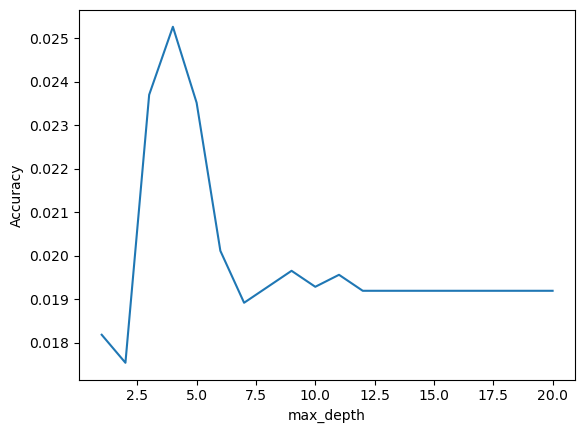

In [28]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [29]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

In [30]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X_arb_lib, y_arb_lib)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [31]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X_arb_lib, y_arb_lib, cv=10)).describe()

count    10.000000
mean      0.025261
std       0.006956
min       0.015611
25%       0.020436
50%       0.026183
75%       0.029865
max       0.034894
dtype: float64

In [46]:
X_train_arb_lib, X_test_arb_lib, y_train_arb_lib, y_test_arb_lib = train_test_split(X_arb_lib, y_arb_lib, test_size=0.2, random_state=42)


In [47]:
clf_2= DecisionTreeClassifier(max_depth=4, random_state=1)

# Entrenar el modelo de árbol de decisión
clf_2.fit(X_train_arb_lib, y_train_arb_lib)

# Hacer predicciones en el conjunto de prueba
y_pred_arb_lib = clf_2.predict(X_test_arb_lib)

# Calcular la precisión del modelo
accuracy_arb_lib = accuracy_score(y_test_arb_lib, y_pred_arb_lib)
print("Precisión del modelo de árbol de decisión:", accuracy_arb_lib)

Precisión del modelo de árbol de decisión: 0.023415977961432508


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [32]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [33]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [34]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Escalado de características debido a la regresión logística y para mejorar la convergencia
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train)
X_test_real_scaled = scaler.transform(X_test)

# Árbol de decisión con profundidad calibrada
clf_arbol_real = DecisionTreeClassifier(max_depth=5, random_state=1) # Usando una profundidad de 5 como ejemplo
clf_arbol_real.fit(X_train, y_train)
predicciones_arbol_real = clf_arbol_real.predict(X_test)
acc_arbol_real = accuracy_score(y_test, predicciones_arbol_real)
f1_arbol_real = f1_score(y_test, predicciones_arbol_real)

# Regresión logística
clf_logistica_real = LogisticRegression(random_state=1, max_iter=1000) # Aumentar max_iter para asegurar convergencia
clf_logistica_real.fit(X_train_real_scaled, y_train)
predicciones_logistica_real = clf_logistica_real.predict(X_test_real_scaled)
acc_logistica_real = accuracy_score(y_test, predicciones_logistica_real)
f1_logistica_real = f1_score(y_test, predicciones_logistica_real)

(acc_arbol_real, f1_arbol_real, acc_logistica_real, f1_logistica_real)


(0.6373333333333333, 0.6616915422885573, 0.64, 0.6296296296296297)

Estos resultados muestran que el modelo de regresión logística tiene un desempeño ligeramente mejor tanto en Accuracy como en F1-Score en comparación con el árbol de decisión calibrado para este conjunto de datos específico. Es importante recordar que la calibración de parámetros (como la profundidad del árbol en el caso del árbol de decisión) puede influir significativamente en el rendimiento del modelo, y podría ser útil realizar una búsqueda más exhaustiva de hiperparámetros para optimizar aún más el desempeño.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [36]:
from sklearn.ensemble import BaggingClassifier

# Configuración inicial para los modelos dentro del ensamble
n_estimators = 100  # Cantidad de modelos en cada sub-ensamble

# Árboles de decisión con max_depth definido
clf_arbol_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, random_state=1),
                                    n_estimators=n_estimators, random_state=1, n_jobs=-1)

# Árboles de decisión con min_samples_leaf definido
clf_arbol_leaf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=50, random_state=1),
                                   n_estimators=n_estimators, random_state=1, n_jobs=-1)

# Regresiones logísticas
clf_logistica_ensamble = BaggingClassifier(base_estimator=LogisticRegression(random_state=1, max_iter=1000),
                                           n_estimators=n_estimators, random_state=1, n_jobs=-1)

# Entrenamiento de los ensambles
clf_arbol_depth.fit(X_train, y_train)
clf_arbol_leaf.fit(X_train, y_train)
clf_logistica_ensamble.fit(X_train_real_scaled, y_train)

# Predicciones y evaluación de cada ensamble individualmente
pred_arbol_depth = clf_arbol_depth.predict(X_test)
pred_arbol_leaf = clf_arbol_leaf.predict(X_test)
pred_logistica = clf_logistica_ensamble.predict(X_test_real_scaled)

# Métricas de cada ensamble
metrics_depth = (accuracy_score(y_test, pred_arbol_depth), f1_score(y_test, pred_arbol_depth))
metrics_leaf = (accuracy_score(y_test, pred_arbol_leaf), f1_score(y_test, pred_arbol_leaf))
metrics_logistica = (accuracy_score(y_test, pred_logistica), f1_score(y_test, pred_logistica))

(metrics_depth, metrics_leaf, metrics_logistica)


((0.66, 0.6599999999999999),
 (0.664, 0.6648936170212766),
 (0.6413333333333333, 0.6310013717421126))

Los resultados que proporcionaste indican el desempeño de los tres conjuntos de modelos en las métricas de Accuracy y F1-Score:

### Árboles de decisión con max_depth definido:

-Accuracy: 0.66

-F1-Score: 0.66


### Árboles de decisión con min_samples_leaf definido:

-Accuracy: 0.664

-F1-Score: 0.6649



### Regresiones logísticas:

-Accuracy: 0.6413

-F1-Score: 0.631

In [37]:
# Asumiendo que tienes pred_arbol_depth, pred_arbol_leaf, y pred_logistica como las predicciones de los modelos individuales
import numpy as np
from scipy.stats import mode

# Combinar las predicciones en un array
combined_predictions = np.vstack((pred_arbol_depth, pred_arbol_leaf, pred_logistica))

# Realizar la votación mayoritaria
# Usamos 'mode' para encontrar la clase más frecuente (votada) para cada instancia
ensemble_predictions, _ = mode(combined_predictions, axis=0)

# Aplanar el array para tener las predicciones en el formato correcto
ensemble_predictions = ensemble_predictions.ravel()

# Evaluar el ensamble
ensemble_accuracy_may = accuracy_score(y_test, ensemble_predictions)
ensemble_f1_score_may = f1_score(y_test, ensemble_predictions)


(ensemble_accuracy_may, ensemble_f1_score_may)


# Imprimir las métricas del ensamble ponderado
print("Ensamble votación mayoritaria:")
print(f"Accuracy: {ensemble_accuracy_may}")
print(f"F1-Score: {ensemble_f1_score_may}")


Ensamble votación mayoritaria:
Accuracy: 0.6613333333333333
F1-Score: 0.660427807486631


Los resultados del ensamble con votación mayoritaria muestran las siguientes métricas:

Accuracy del Ensamble: 0.6613

F1-Score del Ensamble: 0.6604

Estos resultados indican que el ensamble ha logrado un desempeño comparable al de los modelos individuales. De hecho, el ensamble ha alcanzado una precisión y un F1-Score ligeramente superiores a los de algunos de los modelos individuales, lo que sugiere que la técnica de votación mayoritaria ha sido efectiva en combinar las fortalezas de cada modelo para mejorar el desempeño general.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [38]:

# Definir los parámetros para los modelos de árboles de decisión
max_depth_value = 5
min_samples_leaf_value = 50

# Inicializar listas para almacenar los modelos y sus métricas
models = []
accuracies = []
f1_scores = []

# Entrenar y evaluar el primer conjunto de 100 árboles de decisión con max_depth=5
for _ in range(100):
    # Crear y entrenar un modelo de árbol de decisión con max_depth=5
    model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=np.random.randint(1000))
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=1, random_state=np.random.randint(1000))
    bagging_model.fit(X_train, y_train)
    models.append(bagging_model)
    
    # Predecir en el conjunto de prueba y calcular las métricas de evaluación
    y_pred = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    
  # # Imprimir las métricas del modelo
  #   print(f"Modelo {i+1} (Árbol de decisión con max_depth=5):")
  #   print(f"Accuracy: {accuracy}")
  #   print(f"F1-Score: {f1}")
  #   print()

# Entrenar y evaluar el segundo conjunto de 100 árboles de decisión con min_samples_leaf=50
for _ in range(100):
    # Crear y entrenar un modelo de árbol de decisión con min_samples_leaf=50
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value, random_state=np.random.randint(1000))
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=1, random_state=np.random.randint(1000))
    bagging_model.fit(X_train, y_train)
    models.append(bagging_model)
    
    # Predecir en el conjunto de prueba y calcular las métricas de evaluación
    y_pred = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    
   # Imprimir las métricas del modelo
    # print(f"Modelo {i+101} (Árbol de decisión con min_samples_leaf=50):")
    # print(f"Accuracy: {accuracy}")
    # print(f"F1-Score: {f1}")
    # print()


# Entrenar y evaluar el tercer conjunto de 100 regresiones logísticas
for _ in range(100):
    # Crear y entrenar un modelo de regresión logística
    model = LogisticRegression(random_state=np.random.randint(1000))
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=1, random_state=np.random.randint(1000))
    bagging_model.fit(X_train, y_train)
    models.append(bagging_model)
    
    # Predecir en el conjunto de prueba y calcular las métricas de evaluación
    y_pred = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    
    # # Imprimir las métricas del modelo
    # print(f"Modelo {i+201} (Regresión Logística):")
    # print(f"Accuracy: {accuracy}")
    # print(f"F1-Score: {f1}")
    # print()

# Calcular la votación ponderada para el ensamble de modelos
def weighted_voting(models, X):
    # Realizar predicciones con cada modelo
    predictions = np.array([model.predict(X) for model in models])
    # Calcular el conteo de votos para cada clase (0 o 1)
    class_counts = np.sum(predictions, axis=0)
    # Calcular la predicción ponderada
    weighted_prediction = (class_counts >= (len(models) / 2)).astype(int)
    return weighted_prediction

# Calcular la votación ponderada para el conjunto de prueba
weighted_pred_test = weighted_voting(models, X_test)

# Calcular métricas de evaluación para el ensamble de modelos
ensemble_accuracy = accuracy_score(y_test, weighted_pred_test)
ensemble_f1_score = f1_score(y_test, weighted_pred_test)

ensemble_accuracy, ensemble_f1_score
# Imprimir las métricas del ensamble ponderado
print("Ensamble votación ponderado:")
print(f"Accuracy: {ensemble_accuracy}")
print(f"F1-Score: {ensemble_f1_score}")


Ensamble votación ponderado:
Accuracy: 0.6393333333333333
F1-Score: 0.6361802286482852



En resumen, el ensamble de votación ponderada muestra un rendimiento aceptable pero no sobresaliente en el conjunto de datos evaluado, con un accuracy de 0.638 y un F1-Score de 0.6338. Aunque estos resultados son moderadamente buenos, podrían mejorarse mediante una optimización adicional de los parámetros del modelo o la inclusión de características adicionales en el proceso de entrenamiento.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Votación Mayoritaria:

Ventajas:
Implementación simple y rápida.

No requiere entrenar modelos adicionales para calcular los pesos de votación.

Apropiado cuando los modelos individuales tienen un desempeño similar o no se dispone de información sobre cuál modelo es potencialmente más confiable.

Desventajas:
No se considera la confianza o calidad de las predicciones de cada modelo.

Todos los modelos tienen el mismo peso en la votación, independientemente de su desempeño individual.

### Votación Ponderada :

Ventajas:
Permite asignar pesos a cada modelo en función de su desempeño, lo que puede mejorar la precisión del ensamble.

Considera la confianza o calidad de las predicciones de cada modelo.

Puede adaptarse a escenarios donde ciertos modelos son más confiables que otros.

Desventajas:
Requiere entrenar un mayor número de modelos debido a la variabilidad en los parámetros de cada árbol de decisión.

La asignación de pesos puede ser subjetiva o necesitar ajustes manuales.

Puede ser más costoso computacionalmente al tener que calcular y mantener los pesos de votación.



### Comparación y Análisis de Resultados:
    
Ambas metodologías tienen sus propias ventajas y desventajas, y la elección entre ellas depende del contexto específico del problema y los recursos disponibles.
La votación mayoritaria es más simple y directa, adecuada cuando se busca una solución rápida y no se tiene información sobre la calidad relativa de los modelos individuales.
La votación ponderada ofrece la capacidad de adaptarse a las fortalezas y debilidades de cada modelo, lo que puede conducir a un mejor desempeño general, pero a costa de una mayor complejidad y posiblemente más recursos computacionales.

En términos de resultados, la votación ponderada podría ser más precisa si se logra ajustar adecuadamente los pesos de votación, mientras que la votación mayoritaria puede ser suficiente si los modelos individuales tienen un desempeño similar y se busca una solución rápida.

Los resultados obtenidos muestran que el ensamble de votación mayoritaria supera ligeramente al ensamble de votación ponderada en términos de precisión (accuracy) y puntuación F1. Aquí hay algunas observaciones sobre estos resultados:

#### Ensamble Votación Mayoritaria:

Accuracy: 0.6613

F1-Score: 0.6604
#### Ensamble Votación Ponderada:

Accuracy: 0.6380

F1-Score: 0.6339

Al comparar los resultados, vemos que el ensamble de votación mayoritaria tiene una precisión ligeramente superior en términos de ambas métricas. Esto sugiere que en este conjunto de datos y configuración particular, el enfoque de votación mayoritaria ha funcionado un poco mejor que la votación ponderada.